# Regression
In regression, the goal is to predict continuous a real number.

In [1]:
# Import and setup libraries.
%matplotlib notebook
%matplotlib inline

import warnings
warnings.warn = lambda *args, **kwargs: None

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import sklearn

plt.rc("font", size=14)
plt.rcParams["figure.figsize"] = (10, 5)

### Metric methods

#### k-neighbors regression
It is regression varian of k-neighbors alghorithm.

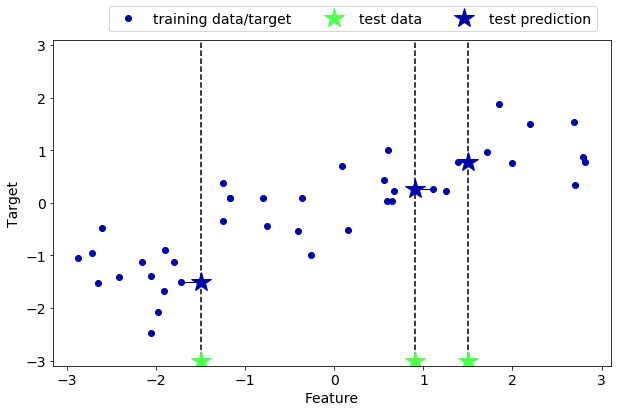

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

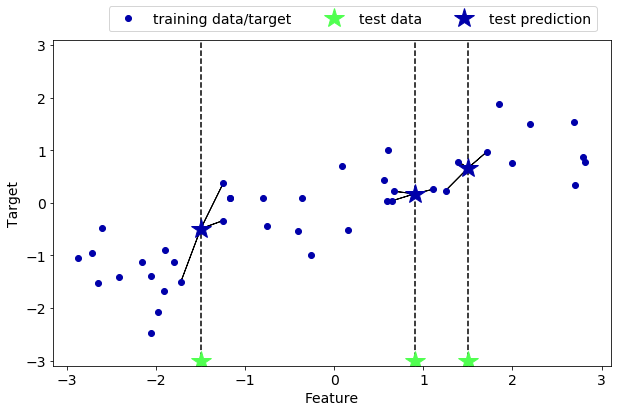

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

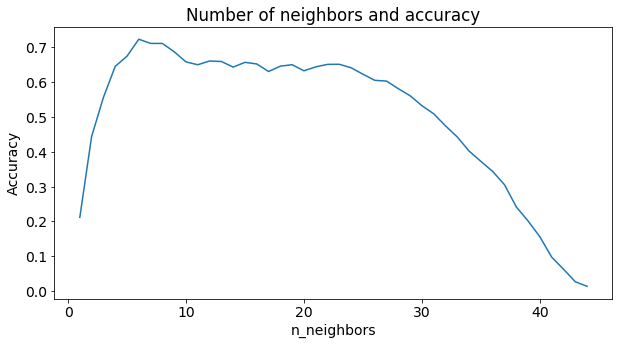

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=0
)

x = []
y = []
for k in range(1, len(X_train)): 
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    x.append(k)
    y.append(model.score(X_test, y_test))

plt.plot(x, y)
plt.title("Number of neighbors and accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

Strengths:
* Easy to understand 
* Fast training

Weaknesses:
* Badly with datasets with many features
* If dataset is large, a prediction might be slow
* Badly with sparse datasets


#### Nonparametric regression
$
\begin{aligned}
&a(x) = f(x, \alpha), \alpha  \in \mathbb{R}^{p} \text{- a parameteric model}\\
&Q(\alpha, X^{l}) = \sum_{i=1}^{l}w_{i}(f(x_{i}, \alpha) - y_{i})^{2} \rightarrow \min_{\alpha}\\
\end{aligned}
$

Main disadvantage is that we need a good parametric model $a(x)$.

$
\begin{aligned}
&f(x, \alpha) = \alpha \text{ - the simplest model}\\
&Q(\alpha, X^{l}) = \sum_{i=1}^{l}w_{i}(x)(\alpha - y_{i})^{2} \rightarrow \min_{\alpha}\\
&w_{i}(x) = K(\frac{\rho(x, x^{(i)})}{h})
\\
\\
&a_{h}(x; X^{l}) = \frac{\sum_{i=1}^{l}y_{i}w_{i}(x)}{\sum_{i=1}^{l}w_{i}(x)} = \frac{\sum_{i=1}^{l}y_{i}K(\frac{\rho(x, x^{(i)})}{h})}{\sum_{i=1}^{l}K(\frac{\rho(x, x^{(i)})}{h})} \text{ - Nadaraya–Watson regression}
\end{aligned}
$

We might get an outlier problem. We can detect outliers and throw them out using LOWESS algorithm.

### Linear models

$
\begin{aligned}
&\hat{Y} = W * X + b
\end{aligned}
$

w[0]: 0.393906  b: -0.031804


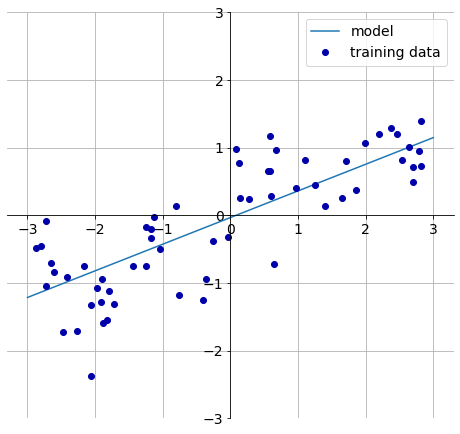

In [5]:
mglearn.plots.plot_linear_regression_wave()

$
\begin{aligned}
&X^{l} = (x_{i}, y_{i})^{l}_{i=1}, \, x_{i} \in \mathbb{R}^{n}, \, y_{i} \in \mathbb{R} - \text{training sample} \\
&a(x, w) = \langle x, w \rangle = \sum_{j=1}^{n}w_{j} f_{j}(x), \, w \in \mathbb{R}^{n} - \text{regression model} \\
&L(a, y) = (a - y)^{2} - \text{loss function(ordinary least squares)} \\
&Q(w) = \sum_{i=1}^{l}(a(x_{i}, w), y_{i})^{2} \rightarrow \min_{w} - \text{learning method}
\end{aligned}
$

#### Gradient descent method
$
\begin{aligned}
&Q(w) = \sum_{i=1}^{l}L_{i}(w)  \rightarrow \min_{w} \\
\\
&w^{(0)} = \text{somehow initialized} \\
&w^{(t + 1)} = w^{(t)} + h \nabla Q(w^{(t)}), \, h - \text{gradient step} \\
&\nabla Q(w) = (\frac{\partial Q(w)}{\partial w_{j}})^{n}_{j=0}
\end{aligned}
$

To optimize $Q(w)$ computation we can use only one random term for $(x_{i}, y_{i})$ from the sum. 

### Ordinary least squares
It is the most classic regression linear algorithm.
Finds parametrs that mimimize the mean squared error.

In [6]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=0
)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"* Wave dataset")
print(f"W={model.coef_}")
print(f"b={model.intercept_}\n")
print(f"Score_train=:{model.score(X_train, y_train)}")
print(f"Score_test=:{model.score(X_test, y_test)}\n\n")


X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"* Boston dataset")
print(f"W={model.coef_}")
print(f"b={model.intercept_}\n")
print(f"Score_train=:{model.score(X_train, y_train)}")
print(f"Score_test=:{model.score(X_test, y_test)}")

* Wave dataset
W=[0.44153666]
b=-0.01711124414733381

Score_train=:0.6592061059587275
Score_test=:0.6932519118518162


* Boston dataset
W=[-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 

Score_train and Score_test are very close together. It means then there is underfitting. Linear models works well with large number of features.

Strengths:
* No model parametrs

Weaknesses:
* No way to control model complexity

### Ridge regression

$
\begin{aligned}
&L_{2}: \overline L_{i}(w) = L_{i}(w) + \frac{\mathcal{T}}{2} \Vert{w}\Vert^{2} = L_{i}(w) + \frac{\mathcal{T}}{2} \sum_{j=1}^{n}w_{j}^{2} \rightarrow \min_{w} \\
&\nabla \overline L_{i}(w) = \nabla L_{i}(w) + \mathcal{T}w
\end{aligned}
$

There is an additional restriction when it tries to frind W coefficients. 
It wants the small magnitude of W coefficients as it is possible. All W must be close to zero. 
Each feature must add a little effect to the result outcome as it is possible.
This constrant is called regularization(to avoid overfitting).

In [7]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=42
)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

print(f"* Boston dataset")
print(f"W={model.coef_}")
print(f"b={model.intercept_}\n")
print(f"Score_train=:{model.score(X_train, y_train)}")
print(f"Score_test=:{model.score(X_test, y_test)}")

* Boston dataset
W=[-1.66018119e+00 -1.41929759e+00 -5.37684614e-01  7.96954640e-01
  7.74009379e-01  9.00801690e+00 -8.92776134e-02 -4.91574523e+00
  4.70214703e+00 -5.75434742e-01 -1.03433773e+00  1.77375286e+00
 -4.16912180e+00 -2.13431099e-01  3.34424596e-03 -1.04210767e+00
  1.56638846e+00 -1.20451306e+00 -1.42821926e+00 -1.61322770e+00
 -2.42136076e-01 -1.94292142e+00 -1.67700882e+00 -1.48142670e+00
 -1.04731871e+00 -1.11313713e+00  1.49485608e+00 -1.32119098e+00
  2.31624450e+00  5.36928772e-01  3.45017547e+00 -1.23455386e+00
 -2.35995304e-01 -4.33677055e-01  5.38893908e-01  1.73276291e+00
 -1.12104286e+00 -1.80935022e+00  2.88495662e+00  1.82746265e+00
  6.32937278e-01 -3.47131888e+00  1.89615705e+00 -3.09731568e+00
  1.29031258e+00  3.20064563e+00 -2.05596659e+00  8.12855686e-01
 -3.32761682e+00  7.96954640e-01 -5.86013095e+00 -3.57189492e+00
  1.58982272e+00 -1.86216410e+00  3.61069409e+00  3.83871054e+00
  2.09210783e-01  1.45641163e+00 -3.71898439e+00 -2.43728264e+00
 -2.82

The parameter alpha is used for balancing between the simplicity of the model and its performance. Increasing alpha forces to move W more toward zero.